In [4]:
#Handle all major imports
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
#Loading all the datasets required
#Load the original PIMA Dataset
dataset = pd.read_csv('data/pima_diabetes_clean.csv')
#Load the 30p corrupted PIMA Dataset
dataset_30 = pd.read_csv('data/pima_diabetes_30_per.csv')

In [39]:
#Describe the  original dataset
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
#Describe the 20p corrupted dataset
print(dataset_30.describe())
X_30 = dataset_30.iloc[:, 0:8]
y_30 = dataset_30.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

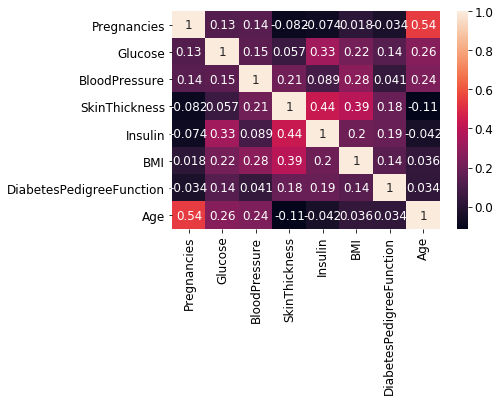

In [40]:
#View The Correlation matrix for original dataset
sns.heatmap(X.corr(), annot = True)


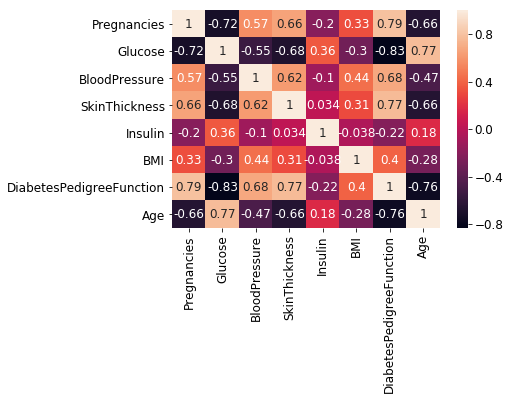

In [41]:
#View The Correlation matrix for 30p corrupted dataset
sns.heatmap(X_30.corr(), annot = True)

In [42]:
#Feature Extraction for original
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[  6.  148.   72.   35.    0.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6      148             72             35        0  33.6   50
1            1       85             66             29        0  26.6   31
2            8      183             64              0        0  23.3   32
3            1       89             66             23       94  28.1   21
4            0      137             40             35      168  43.1   33
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [43]:
#Feature Extraction for 30 percent noise data
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_30_filtered = sel.fit_transform(X_30)

print(X_30.head(1))
print(X_30_filtered[0])
#DiabetesPedigreeFunction was dropped
X_30 = X_30.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_30_top_4_features = top_4_features.fit_transform(X_30, y_30)
print(X_30.head())
print(X_30_top_4_features)
X_30 = X_30.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies   Glucose  BloodPressure  SkinThickness    Insulin      BMI  \
0            1  3.971715     147.056372      70.956019  36.397967  2.99791   

   DiabetesPedigreeFunction       Age  
0                 36.632056  5.001434  
[  1.           3.97171468 147.0563721   70.95601876  36.39796742
   2.99790957  36.63205644   5.00143364]
   Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
0            1    3.971715     147.056372      70.956019  36.397967   
1            1   85.000000      66.000000      29.000000   0.000000   
2            8  183.000000      64.000000       0.000000   0.000000   
3            4    1.400206      88.515605      67.593096  21.723057   
4            5    2.426937     137.130948      36.746923  33.618112   

          BMI        Age  
0    2.997910   5.001434  
1   26.600000  31.000000  
2   23.300000  32.000000  
3   93.492696   1.135593  
4  166.694499   1.852417  
[[  1.           3.97171468  36.39796742   2.99790957]
 [  1.      

In [44]:
#Splitting the Original dataset 80/20 for train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Glucose  Insulin   BMI  Age
603      150      126  35.2   54
118       97        0  28.2   22
247      165      680  52.3   23
157      109      135  25.2   23
468      120        0  30.0   38
193      135        0  52.3   40
306      161      132  25.5   47
319      194        0  23.5   59
97        71       76  20.4   22
530      122      106  29.8   22
327      179        0  35.1   37
619      119        0  32.4   24
518       76        0  32.8   41
632      111        0  26.2   23
524      125        0  31.6   24
536      105        0  29.6   46
597       89       25  27.8   21
462       74       49  35.3   39
17       107        0  29.6   31
739      102        0  39.5   42
263      142        0  32.4   63
241       91       88  33.1   22
344       95        0  36.8   57
302       77       42  35.8   35
704      110      100  28.4   27
240       91        0  29.2   21
170      102        0  30.8   36
691      158        0  42.3   44
490       83       66  36.8   24
45       1

In [45]:
#Splitting the 30 percent corrupted dataset 80/20
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_30, y_30, random_state=0, test_size=0.20)
print(X_train_30)
print(X_test_30)
print(y_train_30)
print(y_test_30)

        Glucose     Insulin         BMI        Age
603  150.000000  126.000000   35.200000  54.000000
118    5.731016   25.056807    0.153174   1.069045
247  165.000000  680.000000   52.300000  23.000000
157  109.000000  135.000000   25.200000  23.000000
468    8.265528    0.679194    1.175197   0.282133
193  135.000000    0.000000   52.300000  40.000000
306  161.000000  132.000000   25.500000  47.000000
319  194.000000    0.000000   23.500000  59.000000
97     0.400964   14.763252   77.577338   4.824838
530  122.000000  106.000000   29.800000  22.000000
327    9.630446    1.410982    1.792471   0.227843
619  119.000000    0.000000   32.400000  24.000000
518   76.000000    0.000000   32.800000  41.000000
632  111.000000    0.000000   26.200000  23.000000
524    0.998033    2.768773    5.113885   0.838478
536    0.340981    4.199712    0.218029   2.745212
597    5.549515   19.229911   23.752964   0.985085
462   74.000000   49.000000   35.300000  39.000000
17   107.000000    0.000000   2

In [46]:
#Scaling the features of original dataset
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
#Implementing Gaussian NB Classifier with clean train data
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [16]:
#Predicting the test Set results with clean test data
y_pred = classifier.predict(X_test)

In [17]:
#Evaluating the Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[97 10]
 [22 25]]
0.6097560975609756
0.7922077922077922


In [18]:
#Calculate the ROC curve and AUC
#Saving the Confusion Matrix and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[97 10]
 [22 25]]


In [21]:
#Steps for adjusting the Threshold
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [22]:
# print the first 10 predicted probabilities of class membership
classifier.predict_proba(X_test)[0:10]

array([[0.03082556, 0.96917444],
       [0.87643626, 0.12356374],
       [0.92255338, 0.07744662],
       [0.20841247, 0.79158753],
       [0.91774295, 0.08225705],
       [0.96203847, 0.03796153],
       [0.32856931, 0.67143069],
       [0.06623496, 0.93376504],
       [0.65675664, 0.34324336],
       [0.50883684, 0.49116316]])

In [23]:
# print the first 10 predicted probabilities for class 1
classifier.predict_proba(X_test)[0:10, 1]

array([0.96917444, 0.12356374, 0.07744662, 0.79158753, 0.08225705,
       0.03796153, 0.67143069, 0.93376504, 0.34324336, 0.49116316])

In [24]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

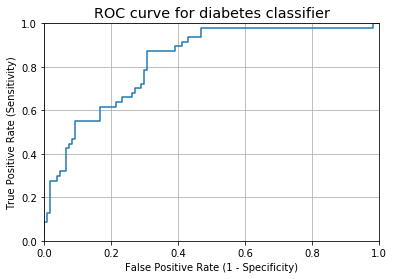

In [25]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [26]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8266056870153111


In [28]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

0.8154586894586895

In [47]:
#Computing the above for data with 30 percent dataset replaced with noisy data

#Scaling the features of 30p
sc_X_30 = StandardScaler()
X_train_30 = sc_X_30.fit_transform(X_train_30)
X_test_30 = sc_X_30.transform(X_test_30)

In [48]:
#Implementing Gaussian NB Classifier with 30p corrupted train data
classifier4 = GaussianNB()
classifier4.fit(X_train_30, y_train_30)

GaussianNB(priors=None)

In [49]:
#Predicting the test Set results with clean test data 
y_pred_30p_corrupted = classifier4.predict(X_test)

In [50]:
#Evaluating the Model which has 20p corrupted train data with clean test data. The truth of y used is from the clean test data
cm = confusion_matrix(y_test, y_pred_30p_corrupted)
print (cm)
print(f1_score(y_test, y_pred_30p_corrupted))
print(accuracy_score(y_test, y_pred_30p_corrupted))

[[97 10]
 [28 19]]
0.4999999999999999
0.7532467532467533


In [43]:
#Calculating Confusion Matrix, Accuracy Score from the Classification Matrix, Classification Error, Sensitivity, 
#Specificity, False Positive Rate, Precision, 
#After this we adust the Plot the ROC Curve
#Then we calculate the AUC
#Following this set of instructions for dataset having 10 percent of the rows populated with noisy data

In [51]:
#Saving the Confusion Matrix and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_30p_corrupted)
print(confusion)
#[row, column]
TP_10 = confusion[1, 1]
TN_10 = confusion[0, 0]
FP_10 = confusion[0, 1]
FN_10 = confusion[1, 0]

[[97 10]
 [28 19]]


In [53]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier4.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [54]:
# print the first 10 predicted probabilities of class membership
classifier4.predict_proba(X_test)[0:10]

array([[0.13012172, 0.86987828],
       [0.87462718, 0.12537282],
       [0.87860879, 0.12139121],
       [0.36908436, 0.63091564],
       [0.83182933, 0.16817067],
       [0.8808696 , 0.1191304 ],
       [0.66010431, 0.33989569],
       [0.32301576, 0.67698424],
       [0.68043341, 0.31956659],
       [0.56296445, 0.43703555]])

In [55]:
# store the predicted probabilities for class 1
y_pred_prob_30 = classifier4.predict_proba(X_test)[:, 1]

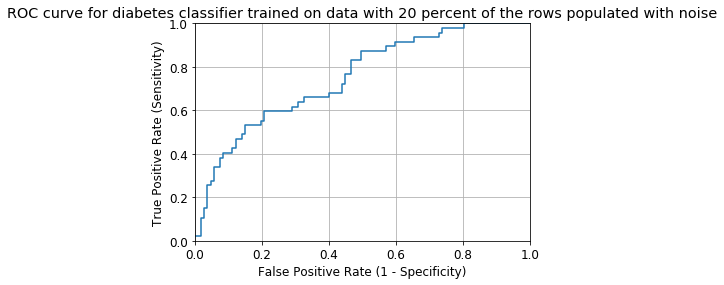

In [56]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_30)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier trained on data with 20 percent of the rows populated with noise')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [57]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob_30))

0.7498508649830982


In [59]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier4, X, y, cv=10, scoring='roc_auc').mean()

0.8154586894586895